In [ ]:
# Importing libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID', axis=1)
df=df.drop('Gender', axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [ ]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status', axis=1)

dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1, N=0))

In [ ]:
smote=SMOTE(sampling_strategy='minority')
xl, y = smote.fit_resample(dm_x, dm_y)
sc = MinMaxScaler()
x = sc.fit_transform(xl)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=42, shuffle=True)

In [ ]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, Y_train, batch_size=20, epochs=60, verbose=0)
eval_model=classifier.evaluate(X_train, Y_train)
eval_model # 90% accuracy

17/17 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.9040


[0.35129159688949585, 0.903954803943634]

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.501)

5/5 [==============================] - 0s 4ms/step


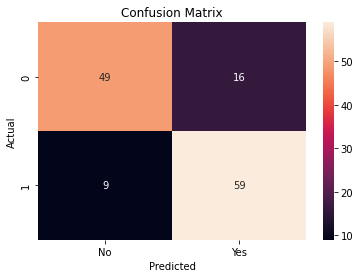

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']);

In [ ]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-24 07:41:18         2378
variables.h5                                   2023-02-24 07:41:18      1041136
metadata.json                                  2023-02-24 07:41:18          

['loan_model.pkl']